# In these project main task is to create dataset from the given data set information 


# Multi Linear Regression
- having more than one independent feature

In [91]:
from sklearn.datasets import fetch_california_housing

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
california = fetch_california_housing()

In [94]:
california


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [95]:
type(california) # bunch means it is a type of dictionary

sklearn.utils._bunch.Bunch

In [96]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [97]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [98]:
#  dependent feature is target_names
california.target_names

['MedHouseVal']

In [99]:
## entire dataset
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [100]:
print(california.target)# it is house price

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [101]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

- Independent features from the "features_name"

In [102]:
## lets prepare the dataframe
dataset = pd.DataFrame(california.data, columns = california.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


- Dependent feature "Price" from the "target"

In [103]:
dataset['Price'] = california.target

In [104]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [105]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [106]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

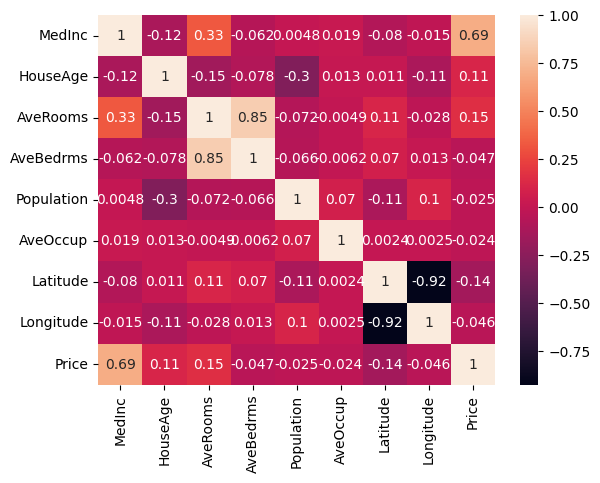

In [107]:
# heatmap
import seaborn as sns 
sns.heatmap( dataset.corr(), annot = True)

In [108]:
## independent and dependent features
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [109]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [110]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((13828, 8), (6812, 8), (13828,), (6812,))

In [111]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [112]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train, X_test

(array([[-1.52169954, -0.75868455, -0.91813082, ..., -0.04014979,
         -0.78315293,  0.65090402],
        [ 0.18205382,  0.3523991 ,  0.30748451, ..., -0.05943619,
          0.8475975 , -1.31911678],
        [-0.17232772,  1.06666717, -0.25107784, ...,  0.09515433,
         -0.87218816,  0.66087881],
        ...,
        [-0.49518065,  0.59048846, -0.59192622, ...,  0.01608523,
         -0.75972261,  0.60103008],
        [ 0.96816708, -1.07613702,  0.39144665, ...,  0.0039722 ,
          0.90383028, -1.18445713],
        [-0.68377427,  1.86029835, -0.83041358, ..., -0.08065717,
          0.9928655 , -1.41387727]]),
 array([[-1.15370815, -0.28250584, -0.50803348, ...,  0.05921216,
          0.19154848,  0.28682423],
        [-0.70700034,  0.11430975, -0.16215378, ..., -0.03549556,
         -0.23956945,  0.06239148],
        [-0.20842797,  1.86029835, -0.59583032, ..., -0.13983657,
          1.0069237 , -1.42385206],
        ...,
        [-0.02167353, -1.07613702,  0.40141018, ...,  

# Model Trainning

In [119]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [120]:
regression

LinearRegression()

In [121]:
regression.fit(X_train, y_train)

LinearRegression()

In [122]:
# slopes
regression.coef_

array([ 8.46603472e-01,  1.20333548e-01, -2.98800785e-01,  3.47243173e-01,
       -8.81413334e-05, -4.17242067e-02, -8.94420371e-01, -8.70401317e-01])

In [125]:
regression.intercept_

np.float64(2.0666362048018536)

In [126]:
## Prediction for the test data
y_pred = regression.predict(X_test)

In [127]:
y_pred

array([0.72563462, 1.76650223, 2.70545812, ..., 1.25803135, 1.66673014,
       2.25826279])

In [132]:
# performance 
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("mse", mean_squared_error(y_test, y_pred))
print("mae", mean_absolute_error(y_test, y_pred))
print(f"rmse {np.sqrt(mean_squared_error(y_test, y_pred))}")

mse 0.536968654337246
mae 0.5295710106684453
rmse 0.7327814505957735


In [134]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score) # accuracy is less because points are not linearly scatterd

0.5970494128783952


# Assumptions

Text(0, 0.5, 'Test Predicted Data')

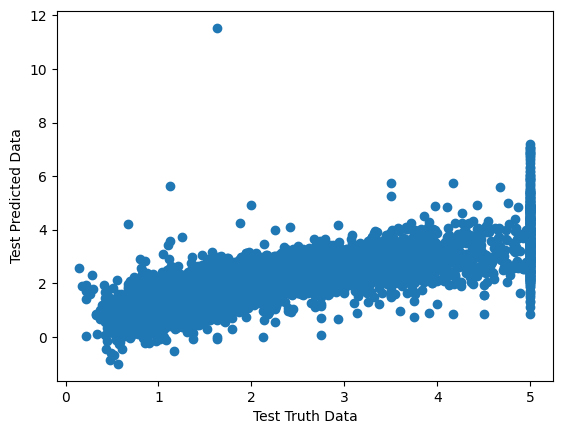

In [135]:
plt.scatter(y_test, y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data") # it has some linear property but much deviated fromthe linear path

In [136]:
residuals = y_test-y_pred
residuals

20046   -0.248635
3024    -1.308502
15663    2.294552
20484   -0.647254
9814     0.175899
           ...   
15316    0.536187
14772   -0.744167
12870   -0.188031
13476   -0.359730
16123    0.812737
Name: Price, Length: 6812, dtype: float64

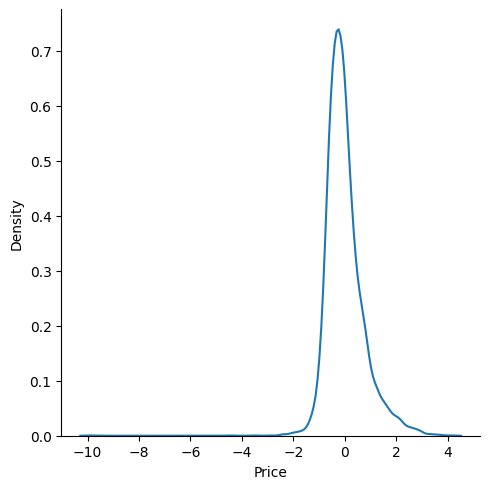

In [138]:
sns.displot(residuals, kind='kde') # it is having normal distribution but not for some data we can improve accuracy of model with different kind of algorithms

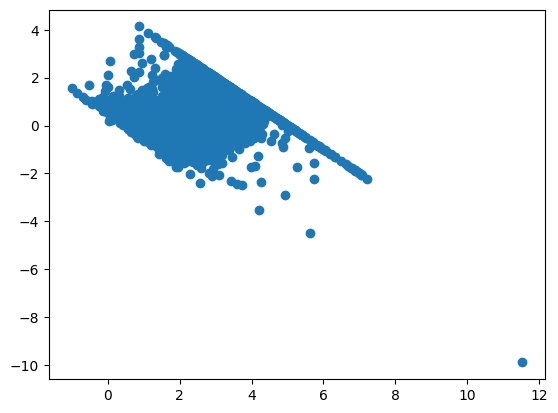

In [139]:
# scatter plot with preictions and residuals
plt.scatter(y_pred, residuals)

- As our projects complete we have to deploy it over AWS therefore we need to do pickling

# Pickling
Python pickle module is used for serialising and de-serialising a python object structure. Any object in python can be pickled so that it can be saved on disk. what pickle does is that it 'seralises' the object first vefore writiting it to file. Pickling is a way to convert a python object(list,dict,etc) inot a character stream. The ide is that character stream contains all the information necessary to reconstruct the obejct in anothr python script.

In [144]:
import pickle
pickle.dump(regression, open('regressor.pkl','wb')) # it is stored in harddrive
# a file name regressor is saved and it is not openable because it is UtF-8 encoded

In [142]:
# for reading a file 
model = pickle.load(open('regressor.pkl','rb'))

In [143]:
model.predict(X_test) # as my model works same work is done by these model also

array([0.72563462, 1.76650223, 2.70545812, ..., 1.25803135, 1.66673014,
       2.25826279])